In [3]:
# Cox Ingersol Ross Model
# dX = gamma*(mu-r)*dt + sigma*sqrt(r)*dW [asi lo tenemos en numerical methods]
# dX = (n-alpha*r)dt + sigma*sqrt(r)*dW [asi en applied C] donce n = mu*gamma (mu es mean)
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Define parameters and time grid
T = 1 # time horizon
nsteps = 252 # number of time steps (working days in a year)
dt = T/nsteps # time step
t=np.linspace(0,T,num=nsteps) # observation times
rate_inicial = .055 # 5.5% anual rate 
sigma = .015
gamma = 10 # mean reversion parameter
mu = .065 # eta/gamma en excel

In [11]:
# Generating normaly distributed random numbers
np.random.seed(12)
rand = np.random.randn(nsteps)

# Euler-Maruyama Aproximation
path = np.zeros(nsteps)
path[0] = rate_inicial
for i in range(1,nsteps):
    rate = path[i-1]
    path[i] = rate + gamma*(mu-rate)*dt + (np.sqrt(rate)*sigma*rand[i-1]*np.sqrt(dt))
    
# Milstein Correction Method
path_m = np.zeros(nsteps)
path_m[0] = rate_inicial
for i in range(1,nsteps):
    rate = path_m[i-1]
    path_m[i] = rate + gamma*(mu-rate)*dt + (np.sqrt(rate)*sigma*rand[i-1]*np.sqrt(dt))+(.5*sigma*((rand[i-1]**2)-1)*dt)


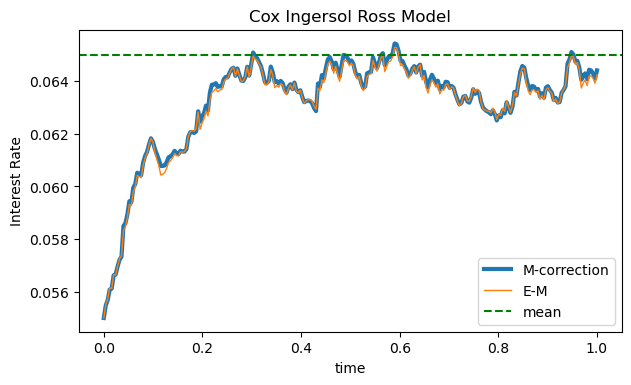

In [16]:
plot0 = plt.figure(0,figsize=(7,4), dpi=100)
plt.title("Cox Ingersol Ross Model")
plt.plot(t,path_m,  linewidth=3, markersize=3, label = "M-correction")  
#plt.plot(t,S, 'go--', linewidth=1, markersize=1, label = "exact solution")
plt.plot(t,path, linewidth=1, markersize=1, label = "E-M")
plt.axhline(y=mu, color='green', linestyle='--',label = "mean")
plt.xlabel("time")
plt.ylabel("Interest Rate")
plt.legend()